**Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, auc, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

**Import Data**

In [4]:
Xtrain = pd.read_csv('C://Users//PUNNAM//Desktop//DS Test//Training//X_train.csv')
ytrain = pd.read_csv('C://Users//PUNNAM//Desktop//DS Test//Training//y_train.csv')
# Loading the dataset

In [5]:
Xtrain.head()
# Check the imported data

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [6]:
ytrain.head()
# Check the imported data

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


**Data Summary**

In [7]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33050 entries, 0 to 33049
Data columns (total 44 columns):
Unique_ID    33050 non-null object
C1           33050 non-null int64
C2           33050 non-null int64
C3           33050 non-null int64
C4           33050 non-null int64
C5           33050 non-null int64
C6           33050 non-null bool
C7           33050 non-null int64
C8           33050 non-null bool
N1           33050 non-null float64
N2           28438 non-null float64
N3           32685 non-null float64
N4           28444 non-null float64
N5           28444 non-null float64
N6           32685 non-null float64
N7           32623 non-null float64
N8           33050 non-null int64
N9           33050 non-null int64
N10          32623 non-null float64
N10.1        32623 non-null float64
N11          32334 non-null float64
N12          28436 non-null float64
N14          32442 non-null float64
N15          32623 non-null float64
N16          28444 non-null float64
N17          2

In [8]:
Xtrain.describe()

,C1,C2,C3,C4,C5,C7,N1,N2,N3,N4,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
count,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.000000,33050.00000,28438.000000,32685.000000,28444.000000,...,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6271.000000,6220.000000,33050.000000,33050.000000,32623.000000
mean,1.119818,2.403873,12.856097,14.437398,1.719395,3.124932,19.97653,81.342710,3.359361,9.574075,...,20.084197,19.512199,0.526391,0.045288,7192.813526,2379.621620,0.744373,125.629394,224.313536,19.587254
std,0.399382,3.399024,12.013457,15.527474,1.320860,2.158905,8.11087,85.397795,0.411040,5.584756,...,16.045120,15.637882,2.144069,0.443838,6460.139952,3379.065104,50.764684,104.391919,186.513844,7.352667
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-194.000000,20.000000,0.000000,2.000000
25%,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,13.45000,21.000000,3.200000,6.000000,...,9.000000,9.000000,0.000000,0.000000,3000.000000,0.000000,-31.000000,54.000000,98.740000,14.000000
50%,1.000000,1.000000,10.000000,10.000000,2.000000,4.000000,19.27500,53.000000,3.400000,9.000000,...,15.000000,14.000000,0.000000,0.000000,5000.000000,1108.440000,0.000000,90.000000,172.600000,19.000000
75%,1.000000,3.000000,20.000000,26.000000,2.000000,4.000000,26.90000,112.000000,3.600000,13.000000,...,28.000000,27.000000,0.000000,0.000000,9500.000000,3408.750000,32.000000,160.000000,300.947500,24.000000
max,3.000000,20.000000,51.000000,67.000000,7.000000,7.000000,48.00000,755.000000,4.400000,59.000000,...,120.000000,111.000000,42.000000,11.000000,60001.000000,22586.670000,257.000000,700.000000,2153.380000,64.000000


In [9]:
# Summary Table for all Variables, Non-null Rows, Class, Unique Values, Missing Values, 
# Minimum, Maximum, Mean, Mode

summarise_data = pd.DataFrame(Xtrain.count(0))
summarise_data = summarise_data.reset_index()
col_class = pd.DataFrame(Xtrain.dtypes)
col_class = col_class.reset_index()
unique = pd.DataFrame(Xtrain.nunique(axis=0))
unique = unique.reset_index()
null_rows = pd.DataFrame(Xtrain.isna().sum())
null_rows = null_rows.reset_index()
min_values = pd.DataFrame(Xtrain.min())
min_values = min_values.reset_index()
max_values = pd.DataFrame(Xtrain.max())
max_values = max_values.reset_index()
mean_values = pd.DataFrame(Xtrain.mean())
mean_values = mean_values.reset_index()
mode_values = Xtrain.mode().sum()
mode_values = mode_values.reset_index()
summarise_data = pd.merge(summarise_data,col_class, on = 'index')
summarise_data = summarise_data.rename(columns = {'0_x': 'Non-null Rows', '0_y' :'Class'}, inplace = False)
summarise_data = pd.merge(summarise_data,unique, on = 'index')
summarise_data = pd.merge(summarise_data,null_rows, on = 'index')
summarise_data = summarise_data.rename(columns = {'0_x': 'Unique Values', '0_y' :'Missing Values'}, inplace = False)
min_max = pd.merge(min_values,max_values, on = 'index')
summarise_data = pd.merge(summarise_data,min_max, on = 'index')
summarise_data = summarise_data.rename(columns = {'0_x': 'Minimum', '0_y' :'Maximum'}, inplace = False)
mean_mode = pd.merge(mean_values,mode_values, on = 'index')
summarise_data = pd.merge(summarise_data,mean_mode,on='index',how='left')
summarise_data = summarise_data.rename(columns = {'index':'Variable Name','0_x': 'Mean', '0_y' :'Mode'}, inplace = False)
summarise_data

,Variable Name,Non-null Rows,Class,Unique Values,Missing Values,Minimum,Maximum,Mean,Mode
0,Unique_ID,33050,object,33050,0,Candidate_0,Candidate_9999,NaN,NaN
1,C1,33050,int64,3,0,1,3,1.119818,1
2,C2,33050,int64,21,0,0,20,2.403873,1
3,C3,33050,int64,52,0,0,51,12.856097,2
4,C4,33050,int64,68,0,0,67,14.437398,1
5,C5,33050,int64,8,0,0,7,1.719395,2
6,C6,33050,bool,2,0,False,True,0.467958,0
7,C7,33050,int64,8,0,0,7,3.124932,4
8,C8,33050,bool,2,0,False,True,0.923328,1
9,N1,33050,float64,1985,0,0,48,19.976530,35


**Feature Engineering** 

In [10]:
# Our above table suggests there are 2 Boolean coloumns [ C6, C8 ]
# In order to include these in our model,we convert True and False to 1 and 0 respectively

Xtrain["C6"] = Xtrain["C6"].astype(int)
Xtrain["C8"] = Xtrain["C8"].astype(int)

In [11]:
# Check if columns are transfomed 
Xtrain

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00,113.39,12.0
1,Candidate_48134,1,4,2,66,2,0,1,1,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.00,262.10,17.0
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,50.29,18.0
3,Candidate_26401,1,1,16,47,1,0,4,1,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,126.52,27.0
4,Candidate_34872,1,1,13,1,1,1,6,1,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,205.47,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33045,Candidate_26099,1,1,14,41,2,0,6,1,15.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.98,349.07,8.0
33046,Candidate_33316,1,6,10,1,2,1,2,1,32.20,...,6.0,6.0,0.0,0.0,3000.0,2637.56,0.0,40.00,87.33,19.0
33047,Candidate_36027,1,1,2,4,2,0,6,1,8.99,...,11.0,10.0,1.0,0.0,15000.0,0.03,66.0,40.00,63.59,20.0
33048,Candidate_3169,1,0,0,0,0,0,0,1,15.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.00,41.60,17.0


In [12]:
# By the summary table - 
# Columns N25, N26, N27, N28 N29, N30, N31, N32 - have at least 80% of missing values
# So we drop these coloumns 
Xtrain.drop(['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32'],axis='columns', inplace=True)

In [13]:
Xtrain.shape

(33050, 36)

In [14]:
# Concatenate Variables and Dependent Variable into one table for easy analysis
ytrain.rename(columns = {'Unique_ID':'Unique_ID2'}, inplace = True)
Xtrain = pd.concat([Xtrain, ytrain], axis=1)
Xtrain.drop('Unique_ID2', axis='columns', inplace=True)
Xtrain.shape

(33050, 37)

In [16]:
# Check for remaining null values in all columns 
Xtrain.isna().sum()

Unique_ID                0
C1                       0
C2                       0
C3                       0
C4                       0
C5                       0
C6                       0
C7                       0
C8                       0
N1                       0
N2                    4612
N3                     365
N4                    4606
N5                    4606
N6                     365
N7                     427
N8                       0
N9                       0
N10                    427
N10.1                  427
N11                    716
N12                   4614
N14                    608
N15                    427
N16                   4606
N17                   4606
N18                   4606
N19                   4571
N20                   4571
N21                   4571
N22                   4571
N23                   2486
N24                      0
N33                      0
N34                      0
N35                    427
Dependent_Variable       0
d

<AxesSubplot:xlabel='N2', ylabel='count'>

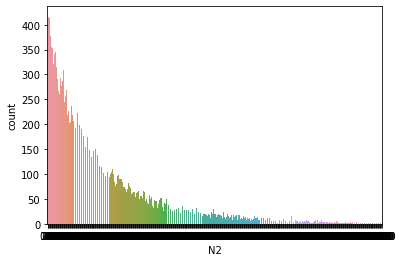

In [17]:
# Maximum number of missing values belong to N2 and N12
sns.countplot(x='N2',data=Xtrain)

In [20]:
# Check all columns where N2 has null values
Xtrain[Xtrain['N2'].isna()]

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,NaN,NaN,NaN,NaN,27.816,1750.000000,58.00,113.39,12.0,1
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,20.000,6250.000000,24.00,50.29,18.0,1
8,Candidate_12081,1,0,35,31,0,0,0,1,11.75,...,NaN,NaN,NaN,NaN,32.000,3750.000000,36.00,0.00,18.0,0
15,Candidate_13802,1,0,1,11,0,0,0,1,11.95,...,NaN,NaN,NaN,NaN,14.000,4166.666667,80.00,132.76,17.0,0
17,Candidate_16860,1,0,5,31,0,1,0,1,21.45,...,NaN,NaN,NaN,NaN,34.000,2333.333333,160.00,303.25,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33021,Candidate_54659,1,0,30,1,0,1,0,1,22.00,...,NaN,NaN,NaN,NaN,18.000,4333.333333,120.02,229.18,22.0,1
33028,Candidate_24107,1,0,3,1,0,1,0,1,13.80,...,NaN,NaN,NaN,NaN,438.000,936.416667,151.60,258.33,19.0,0
33035,Candidate_19916,1,0,0,35,0,0,0,1,10.00,...,NaN,NaN,NaN,NaN,38.000,3000.000000,80.00,106.86,11.0,0
33043,Candidate_54666,1,0,5,59,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,28.000,975.000000,66.00,138.29,12.0,1


In [21]:
# Columns with N2 as Null also has other columns N19,N20,N21,N22 etc with Null values
# Check all columns where N12 has null values
Xtrain[Xtrain['N12'].isna()]

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,NaN,NaN,NaN,NaN,27.816,1750.000000,58.00,113.39,12.0,1
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,20.000,6250.000000,24.00,50.29,18.0,1
8,Candidate_12081,1,0,35,31,0,0,0,1,11.75,...,NaN,NaN,NaN,NaN,32.000,3750.000000,36.00,0.00,18.0,0
15,Candidate_13802,1,0,1,11,0,0,0,1,11.95,...,NaN,NaN,NaN,NaN,14.000,4166.666667,80.00,132.76,17.0,0
17,Candidate_16860,1,0,5,31,0,1,0,1,21.45,...,NaN,NaN,NaN,NaN,34.000,2333.333333,160.00,303.25,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33021,Candidate_54659,1,0,30,1,0,1,0,1,22.00,...,NaN,NaN,NaN,NaN,18.000,4333.333333,120.02,229.18,22.0,1
33028,Candidate_24107,1,0,3,1,0,1,0,1,13.80,...,NaN,NaN,NaN,NaN,438.000,936.416667,151.60,258.33,19.0,0
33035,Candidate_19916,1,0,0,35,0,0,0,1,10.00,...,NaN,NaN,NaN,NaN,38.000,3000.000000,80.00,106.86,11.0,0
33043,Candidate_54666,1,0,5,59,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,28.000,975.000000,66.00,138.29,12.0,1


In [22]:
# Columns with N12 as Null also has other columns N19,N20,N21,N22 etc with Null values
# Check total number of rows with Null values from all columns 
Xtrain[Xtrain.isna().any(axis=1)]

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
0,Candidate_5926,1,0,11,31,0,0,0,1,23.75,...,NaN,NaN,NaN,NaN,27.816,1750.000000,58.00,113.39,12.0,1
2,Candidate_51717,1,0,19,2,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,20.000,6250.000000,24.00,50.29,18.0,1
8,Candidate_12081,1,0,35,31,0,0,0,1,11.75,...,NaN,NaN,NaN,NaN,32.000,3750.000000,36.00,0.00,18.0,0
11,Candidate_8149,1,1,7,1,1,0,4,0,30.73,...,2077.0,22.0,0.81,2.0,NaN,3889.583333,80.00,171.41,20.0,1
15,Candidate_13802,1,0,1,11,0,0,0,1,11.95,...,NaN,NaN,NaN,NaN,14.000,4166.666667,80.00,132.76,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33021,Candidate_54659,1,0,30,1,0,1,0,1,22.00,...,NaN,NaN,NaN,NaN,18.000,4333.333333,120.02,229.18,22.0,1
33028,Candidate_24107,1,0,3,1,0,1,0,1,13.80,...,NaN,NaN,NaN,NaN,438.000,936.416667,151.60,258.33,19.0,0
33035,Candidate_19916,1,0,0,35,0,0,0,1,10.00,...,NaN,NaN,NaN,NaN,38.000,3000.000000,80.00,106.86,11.0,0
33043,Candidate_54666,1,0,5,59,0,0,0,1,29.00,...,NaN,NaN,NaN,NaN,28.000,975.000000,66.00,138.29,12.0,1


In [23]:
# Null values from all columns include 20% of our data - could be dropped
Xtrain.dropna(inplace=True)
Xtrain.shape

(26027, 37)

In [24]:
# Verify that dataset has no more null values 
Xtrain.isna().sum()

Unique_ID             0
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
N1                    0
N2                    0
N3                    0
N4                    0
N5                    0
N6                    0
N7                    0
N8                    0
N9                    0
N10                   0
N10.1                 0
N11                   0
N12                   0
N14                   0
N15                   0
N16                   0
N17                   0
N18                   0
N19                   0
N20                   0
N21                   0
N22                   0
N23                   0
N24                   0
N33                   0
N34                   0
N35                   0
Dependent_Variable    0
dtype: int64

In [26]:
Xtrain.nunique(axis=0)

Unique_ID             26027
C1                        3
C2                       21
C3                       52
C4                       68
C5                        7
C6                        2
C7                        7
C8                        2
N1                     1870
N2                      496
N3                       19
N4                       50
N5                       46
N6                       19
N7                      105
N8                       43
N9                     1969
N10                      37
N10.1                    38
N11                      79
N12                    3158
N14                      95
N15                      16
N16                       6
N17                   15655
N18                     180
N19                   13147
N20                      93
N21                      95
N22                      16
N23                     220
N24                    4905
N33                     949
N34                   11475
N35                 

**Exploratory Data Analysis**

<AxesSubplot:xlabel='Dependent_Variable', ylabel='count'>

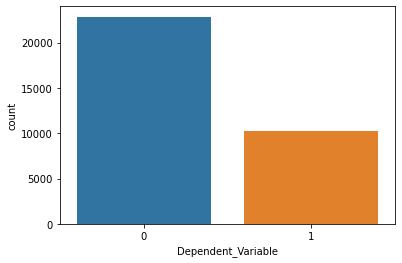

In [25]:
# Visualising how much of our target consists of 1s and 0s
sns.countplot(x='Dependent_Variable',data=ytrain)

<AxesSubplot:xlabel='N17'>

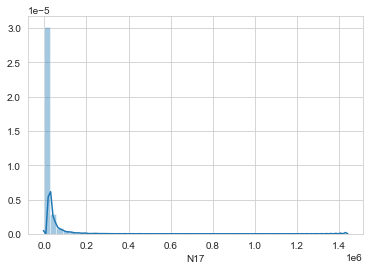

In [30]:
# N17 has maximun number of unique values spread out over a wide range 
sns.distplot(Xtrain['N17'])

Text(0.5, 0, 'N1')

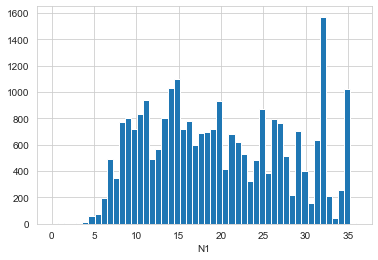

In [32]:
# Visualising some other variables 
sns.set_style('whitegrid')
Xtrain['N1'].hist(bins=50)
plt.xlabel('N1')

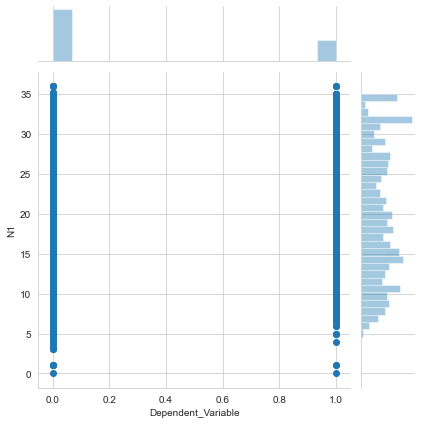

In [35]:
sns.jointplot(x='Dependent_Variable',y='N1',data=Xtrain)

Text(0.5, 0, 'C4')

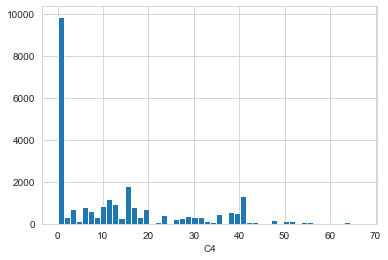

In [36]:
sns.set_style('whitegrid')
Xtrain['C4'].hist(bins=50)
plt.xlabel('C4')

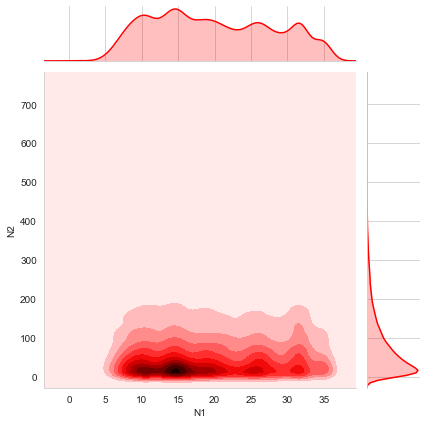

In [41]:
sns.jointplot(x='N1',y='N2',data=Xtrain,color='red',kind='kde')

<AxesSubplot:>

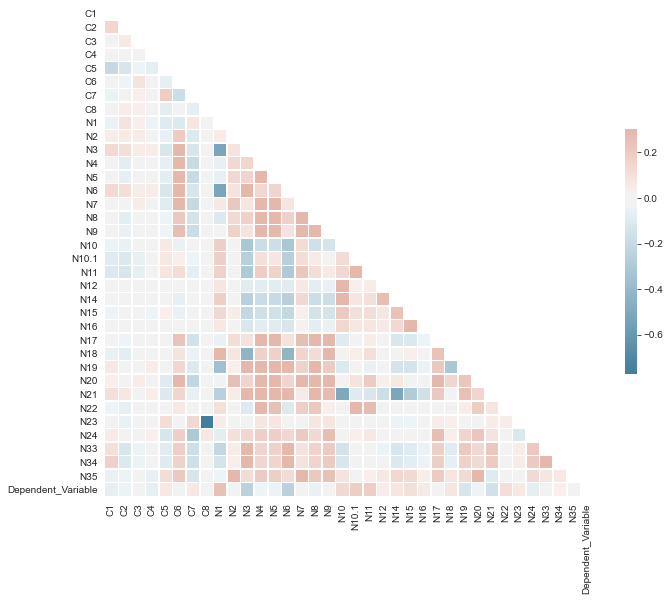

In [51]:
# Displaying the heatmap to better understand redundant features 
from string import ascii_letters
sns.set_style(style="white")
# Compute the correlation matrix
corr = Xtrain.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [52]:
# correlation between all variables
corr

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
C1,1.000000,0.146987,0.027361,0.012474,-0.203758,0.010339,-0.044276,0.019691,-0.045847,0.047349,...,0.060477,0.032178,0.098116,-0.037518,-0.022335,0.051560,0.099221,0.171193,-0.049689,-0.060284
C2,0.146987,1.000000,0.053819,0.012653,-0.123198,-0.033089,0.002959,0.047147,0.091762,0.052040,...,-0.013703,-0.022453,0.066052,-0.066045,-0.054297,0.005159,-0.124368,-0.105317,-0.044978,-0.039921
C3,0.027361,0.053819,1.000000,-0.004951,-0.037134,0.082526,0.034826,0.030380,0.030055,0.041263,...,-0.016032,0.044509,0.014645,0.010434,-0.015031,-0.022589,-0.042656,-0.041714,0.010618,-0.016725
C4,0.012474,0.012653,-0.004951,1.000000,-0.069483,0.009144,0.003243,-0.010962,-0.041244,-0.003240,...,0.041052,-0.002309,0.039484,0.007704,0.001958,0.033033,0.019908,0.019492,-0.056809,-0.060323
C5,-0.203758,-0.123198,-0.037134,-0.069483,1.000000,-0.061581,0.194289,-0.077705,-0.091697,-0.057417,...,-0.013192,-0.097206,-0.099109,0.012802,0.114640,-0.130890,-0.087015,-0.095276,0.116178,0.057833
C6,0.010339,-0.033089,0.082526,0.009144,-0.061581,1.000000,-0.177307,0.003959,-0.109809,0.200273,...,0.147906,0.369777,0.150853,0.061416,0.002545,0.190476,0.188668,0.163786,0.211284,-0.016318
C7,-0.044276,0.002959,0.034826,0.003243,0.194289,-0.177307,1.000000,-0.069282,0.070346,-0.109990,...,-0.109540,-0.222773,-0.058431,-0.021623,0.142304,-0.303807,-0.167517,-0.161561,-0.124479,0.061709
C8,0.019691,0.047147,0.030380,-0.010962,-0.077705,0.003959,-0.069282,1.000000,0.010052,0.023647,...,-0.003016,0.023076,-0.005589,-0.021820,-0.771450,0.058400,-0.021249,-0.021659,0.001696,-0.028516
N1,-0.045847,0.091762,0.030055,-0.041244,-0.091697,-0.109809,0.070346,0.010052,1.000000,0.048229,...,-0.355327,0.008479,-0.250073,0.098321,0.040177,-0.076779,-0.214549,-0.131673,-0.038881,0.254551
N2,0.047349,0.052040,0.041263,-0.003240,-0.057417,0.200273,-0.109990,0.023647,0.048229,1.000000,...,0.036302,0.260412,0.041743,0.017622,-0.022331,0.105337,0.045505,0.040115,0.314722,-0.006390


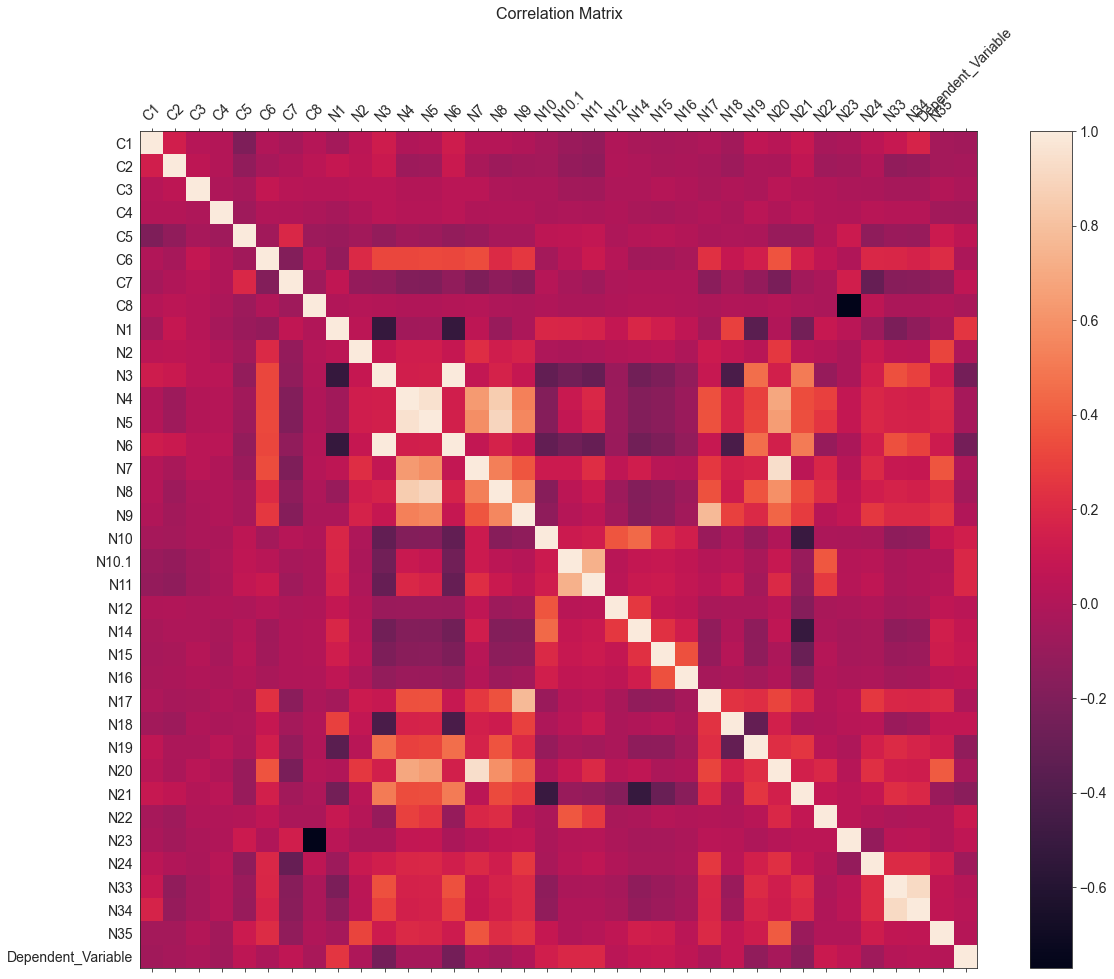

In [56]:
# Plotting a heatmap with all the correlation 
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(Xtrain.select_dtypes(['number']).shape[1]), Xtrain.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(Xtrain.select_dtypes(['number']).shape[1]), Xtrain.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

**Feature Scaling** 

In [58]:
# dropping Unique_ID column as it serves no purpose in further analysis
Xtrain.drop('Unique_ID', axis='columns', inplace=True)
Xtrain

,C1,C2,C3,C4,C5,C6,C7,C8,N1,N2,...,N19,N20,N21,N22,N23,N24,N33,N34,N35,Dependent_Variable
1,1,4,2,66,2,0,1,1,11.05,22.0,...,25856.0,17.0,0.88,1.0,40.0,10833.333330,160.00,262.10,17.0,0
3,1,1,16,47,1,0,4,1,17.99,1.0,...,1006.0,6.0,1.00,0.0,26.0,2413.666667,70.00,126.52,27.0,0
4,1,1,13,1,1,1,6,1,27.50,206.0,...,3398.0,31.0,0.96,0.0,44.0,7666.666667,100.00,205.47,21.0,0
5,1,0,30,13,2,0,2,1,13.50,14.0,...,4110.0,11.0,0.90,2.0,48.0,4250.000000,150.00,254.51,13.0,0
6,1,0,41,0,2,1,2,1,8.50,27.0,...,38757.0,23.0,1.00,2.0,30.0,4875.000000,51.00,80.50,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33044,3,1,19,0,1,1,6,1,8.20,32.0,...,20232.0,17.0,1.00,0.0,12.0,8166.666667,72.00,313.49,15.0,0
33045,1,1,14,41,2,0,6,1,15.50,19.0,...,7661.0,7.0,1.00,0.0,18.0,7000.000000,199.98,349.07,8.0,0
33046,1,6,10,1,2,1,2,1,32.20,42.0,...,868.0,41.0,0.63,2.0,42.0,4420.000000,40.00,87.33,19.0,0
33047,1,1,2,4,2,0,6,1,8.99,137.0,...,20105.0,28.0,0.75,0.0,18.0,6971.833333,40.00,63.59,20.0,0


In [61]:
X = Xtrain.drop('Dependent_Variable', axis='columns')
y = Xtrain['Dependent_Variable']

In [64]:
# Scaling our data
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [65]:
scaled_data = scaler.transform(X)

In [67]:
scaled_data.shape

(26027, 35)

**Feature Extraction by PCA**

In [68]:
from sklearn.decomposition import PCA

In [69]:
# Reducing 35 columns to 2 by PCA
pca = PCA(n_components=2)

In [71]:
pca_data = scaled_data
pca_data.shape

(26027, 35)

In [72]:
pca.fit(pca_data)

PCA(n_components=2)

In [73]:
# Transforming this data to its first 2 principal components
x_pca = pca.transform(pca_data)

In [74]:
x_pca.shape

(26027, 2)

Text(0, 0.5, 'Second Principal Component')

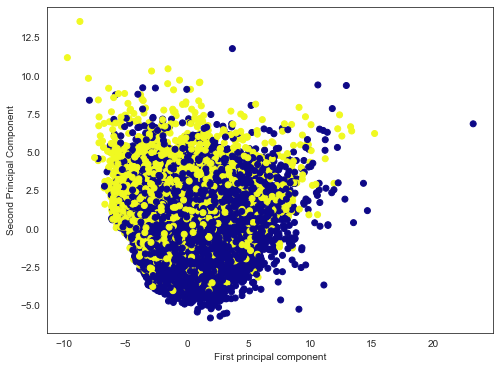

In [76]:
# Plotting these two dimensions out
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [77]:
# In this numpy matrix array, each row represents a principal component, 
# And each column relates back to the original features 
# We can visualize this relationship with a heatmap
pca.components_

array([[ 3.82567227e-02, -1.82055698e-02,  6.86928738e-03,
         1.54001875e-02, -5.47018461e-02,  1.96384911e-01,
        -1.26740263e-01,  4.75172429e-05, -1.10088216e-01,
         1.00635411e-01,  2.07945812e-01,  3.34107081e-01,
         3.34834486e-01,  2.07945812e-01,  2.55398726e-01,
         3.19353307e-01,  2.70946613e-01, -1.23929140e-01,
         8.33162336e-04,  2.49676878e-02, -4.87602089e-02,
        -1.19078187e-01, -9.77341065e-02, -5.65545401e-02,
         2.18657202e-01,  2.38340880e-02,  1.99109619e-01,
         2.92397748e-01,  2.16379252e-01,  7.21449955e-02,
         2.14498962e-02,  1.44719732e-01,  1.75806892e-01,
         1.64402251e-01,  1.30477891e-01],
       [-9.23237713e-02, -7.51544062e-02, -9.86035567e-03,
        -3.08350698e-02,  4.42704358e-02,  2.26668695e-02,
        -2.66306721e-02, -8.81992703e-03,  2.66521608e-01,
         6.20293346e-02, -3.58444983e-01,  1.63333586e-01,
         1.51108273e-01, -3.58444983e-01,  2.45614824e-01,
         1.24

In [78]:
X.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'N1', 'N2', 'N3', 'N4',
       'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N10.1', 'N11', 'N12', 'N14',
       'N15', 'N16', 'N17', 'N18', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24',
       'N33', 'N34', 'N35'],
      dtype='object')

In [79]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

<AxesSubplot:>

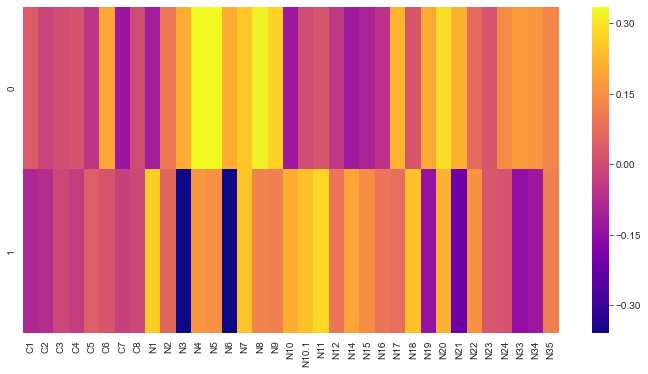

In [80]:
# Relationship between first and second principal component and all features
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

**Classification by Logistic Regression**

Model will be trained and tested in two ways :  
 1 - With all original Scaled Features 
 2 - With two principal component features 

In [82]:
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.33)

In [92]:
#Train and fit a logistic regression model on the training set
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

**Predictions and Evaluations**

In [93]:
# Predicting on our test dataset
predictions = log_model.predict(X_test)

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83      6091
           1       0.60      0.27      0.37      2498

    accuracy                           0.74      8589
   macro avg       0.68      0.60      0.60      8589
weighted avg       0.71      0.74      0.70      8589



In [95]:
# Calculation of yscore for AUC 
y_score = log_model.predict_proba(X_test)[:,1]

In [96]:
# Calculation of FPR and TPR and thresh
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=1)

In [97]:
#Area under the ROC Curve
auc_algo =  auc(false_positive_rate, true_positive_rate)

In [98]:
print(auc_algo)

0.7383280454605023


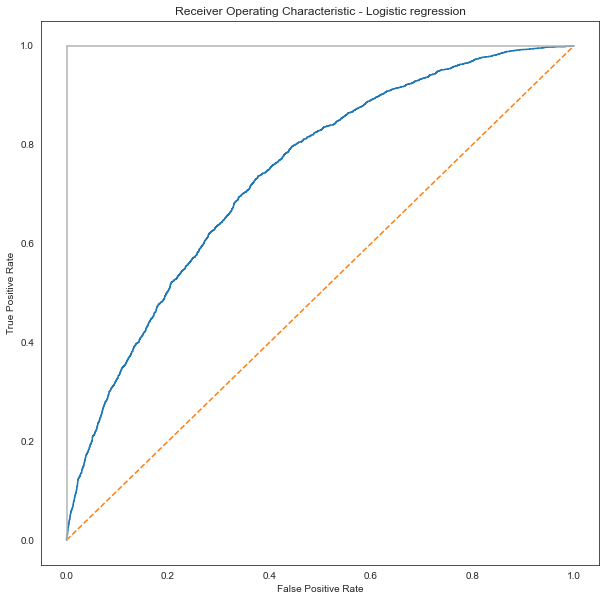

In [99]:
# Plotting the ROC curve 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Classification by Logistic Regression with principal components**

In [100]:
# Splitting the PCA components into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.33)

In [101]:
#Train and fit a logistic regression model on the training set
log_model2 = LogisticRegression()
log_model2.fit(X_train,y_train)

LogisticRegression()

**Predictions and Evaluations**

In [103]:
# Predicting on our test dataset
predictions = log_model2.predict(X_test)

In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      6069
           1       0.60      0.13      0.21      2520

    accuracy                           0.72      8589
   macro avg       0.67      0.55      0.52      8589
weighted avg       0.69      0.72      0.65      8589



In [106]:
# Calculation of yscore for AUC 
y_score = log_model2.predict_proba(X_test)[:,1]

In [107]:
# Calculation of FPR and TPR and thresh
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=1)

In [108]:
#Area under the ROC Curve
auc_algo =  auc(false_positive_rate, true_positive_rate)

In [109]:
print(auc_algo)

0.6622220129882018


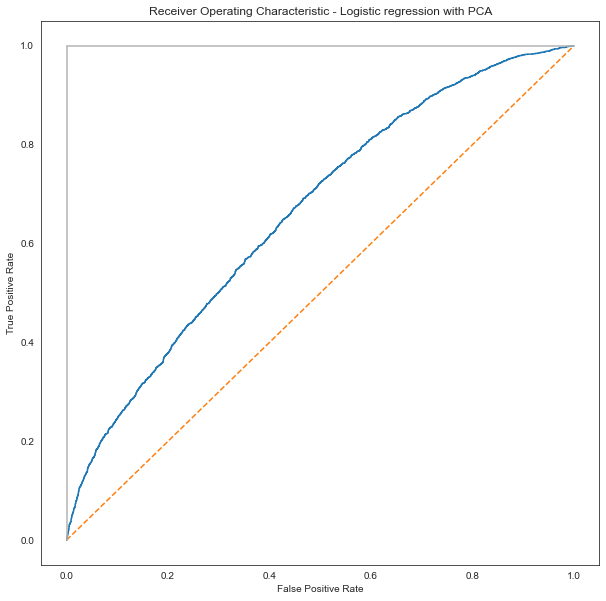

In [110]:
# Plotting the ROC curve 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression with PCA')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Classification using Support vector machines**

In [158]:
from sklearn.svm import SVC
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y,test_size=0.30)

In [159]:
# Calling the SVC() model from sklearn
s_model = SVC(probability=True)

In [161]:
# fitting the model to the training data
s_model.fit(X_train,y_train)

SVC(probability=True)

**Predictions and Evaluations**

In [162]:
predictions = s_model.predict(X_test)

In [163]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      5592
           1       0.64      0.19      0.29      2217

    accuracy                           0.74      7809
   macro avg       0.70      0.57      0.57      7809
weighted avg       0.72      0.74      0.69      7809



In [164]:
# Calculation of yscore for AUC 
y_score = s_model.predict_proba(X_test)[:,1]

In [165]:
# Calculation of FPR and TPR and thresh
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score, pos_label=1)

In [166]:
#Area under the ROC Curve
auc_algo =  auc(false_positive_rate, true_positive_rate)

In [167]:
print(auc_algo)

0.7148929006771063


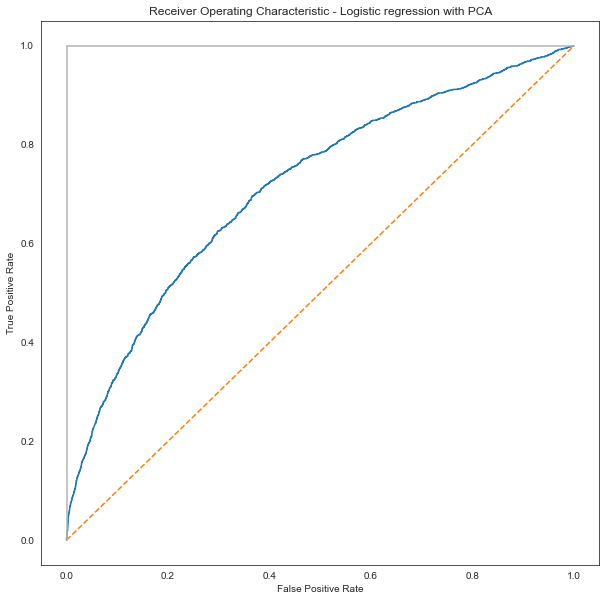

In [168]:
# Plotting the ROC curve 
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression with PCA')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [170]:
y_score.shape

(7809,)

**Importing X_test and applying the Model**

In [174]:
Xtest = pd.read_csv('C://Users//PUNNAM//Desktop//DS Test//Test//X_test.csv')

In [176]:
#putting X_test in the same format of X_train
Xtest["C6"] = Xtest["C6"].astype(int)
Xtest["C8"] = Xtest["C8"].astype(int)

In [177]:
Xtest.drop(['N25', 'N26', 'N27', 'N28', 'N29', 'N30', 'N31', 'N32'],axis='columns', inplace=True)

In [178]:
Xtest.shape

(11017, 36)

In [180]:
Xtest.dropna(inplace=True)
Xtest.shape

(8703, 36)

In [ ]:
Xtest.drop('Unique_ID', axis='columns', inplace=True)

In [184]:
# fitting our model on entire X_train without dividing on it by Xtrain and Xtest
X = Xtrain.drop('Dependent_Variable', axis='columns')
y = Xtrain['Dependent_Variable']

In [185]:
# Scaling Xtrain 
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [186]:
scaled_data = scaler.transform(X)
scaled_data.shape

(26027, 35)

In [187]:
# Scaling Xtest
scaler.fit(Xtest)

StandardScaler()

In [188]:
test_data = scaler.transform(Xtest)
test_data.shape

(8703, 35)

In [189]:
# fitting model on entired Xtrain dataset 
log_model = LogisticRegression()
log_model.fit(scaled_data,y)

LogisticRegression()

In [190]:
# predicting on Xtest using above model
y_score = log_model.predict_proba(test_data)[:,1]

In [192]:
y_score.shape

(8703,)

In [193]:
# converting yscore into dataframe to export 
probabilities = pd.DataFrame(y_score)

In [194]:
probabilities

,0
0,0.314102
1,0.385708
2,0.187644
3,0.877026
4,0.522290
...,...
8698,0.603628
8699,0.297099
8700,0.406520
8701,0.160156


In [195]:
Xtest = pd.read_csv('C://Users//PUNNAM//Desktop//DS Test//Test//X_test.csv')
Xtest_proba = Xtest['Unique_ID']

In [199]:
# Prepairing final results 
probabilities = probabilities.reset_index()
Xtest_proba = Xtest_proba.reset_index()
Xtest_proba = pd.merge(Xtest_proba, probabilities , on = 'index') 
Xtest_proba

,index,Unique_ID,0
0,0,Candidate_1602,0.314102
1,1,Candidate_29650,0.385708
2,2,Candidate_31061,0.187644
3,3,Candidate_5768,0.877026
4,4,Candidate_27059,0.522290
...,...,...,...
8698,8698,Candidate_14236,0.603628
8699,8699,Candidate_42824,0.297099
8700,8700,Candidate_49551,0.406520
8701,8701,Candidate_21610,0.160156


In [204]:
# export results 
Xtest_proba.to_excel(r'C://Users//PUNNAM//Desktop//DS Test//Xtest_proba.xlsx')